In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#importing manager csv
female_labor = pd.read_csv('Data/labor_participation.csv')
female_labor.head()
#removing additional years
female_labor_2019=female_labor[["new_code", "year_2019"]]
female_labor_2019.head()
#renaming 2019

female_labor_2019_final=female_labor_2019.rename(columns = {
    "year_2019" :"labor"
})
female_labor_2019_final.head()

,new_code,labor
0,AW,0.00
1,AF,21.59
2,AO,76.14
3,AL,46.71
4,AD,0.00


In [2]:
#importing parliament
female_parliament = pd.read_csv('Data/parliament_seats.csv')
female_parliament.head()
#reducing columns
female_parliament_2019=female_parliament[["new_code", "year_2019"]]
female_parliament_2019.head()
#renaming 2019
female_parliament_2019_final=female_parliament_2019.rename(columns = {
    "year_2019" :"parliament"
})
female_parliament_2019_final.head()

,new_code,parliament
0,AL,29.51
1,DZ,25.76
2,AD,46.43
3,AO,30.00
4,AG,11.11


In [3]:
labor_regression=pd.merge(female_parliament_2019_final, female_labor_2019_final, how='inner', on=["new_code", "new_code"])

In [4]:

labor_regression_final=labor_regression[(labor_regression["labor"]>0)]
labor_regression_final

,new_code,parliament,labor
0,AL,29.51,46.71
1,DZ,25.76,14.59
3,AO,30.00,76.14
5,AM,23.48,47.07
6,AU,30.46,60.30
...,...,...,...
129,UZ,16.00,52.38
130,VU,0.00,60.96
131,VN,26.72,72.71
132,ZM,17.96,70.37


In [5]:
X = labor_regression_final[['parliament']]
y = labor_regression_final["labor"].values.reshape(-1, 1)
print(X.shape, y.shape)

(121, 1) (121, 1)


In [6]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [7]:
# from sklearn.preprocessing import StandardScaler
# ### BEGIN SOLUTION
# X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)

In [8]:
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)
# y_train_scaled = y_scaler.transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

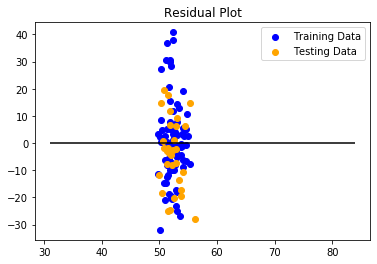

In [11]:
predictions = model.predict(X_test)
model.fit(X_train, y_train)
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.savefig("static/images/machine_learning.svg")

In [12]:
# # Calculate classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
# print(classification_report(y_test, predictions,
#                             target_names=target_names))
print (X_test, predictions)




     parliament
48        31.88
51        38.10
6         30.46
59        10.11
28        53.22
70        21.28
81        17.33
12         9.38
43        30.89
120       17.45
20        20.00
67        23.33
13         7.23
39        38.76
100       10.00
131       26.72
123       34.86
0         29.51
99        61.25
116       16.48
71        25.00
49         2.54
34        26.84
77        20.00
46        19.38
14        14.89
17        15.01
128       19.19
85        40.83
110        5.33
26        45.61 [[53.08791912]
 [53.7423203 ]
 [52.93852207]
 [50.79751498]
 [55.33308331]
 [51.97270167]
 [51.55712536]
 [50.72071227]
 [52.98376202]
 [51.56975046]
 [51.8380339 ]
 [52.18838052]
 [50.4945125 ]
 [53.81175837]
 [50.78594197]
 [52.54503968]
 [53.40144252]
 [52.83857333]
 [56.17791313]
 [51.46769754]
 [52.36407987]
 [50.00108139]
 [52.55766479]
 [51.8380339 ]
 [51.7728042 ]
 [51.30041492]
 [51.31304003]
 [51.75281446]
 [54.0295414 ]
 [50.29461503]
 [54.53244135]]


In [14]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 179.46056522910771, R2: -0.03836478355951778
